In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Better visuals
sns.set(style="whitegrid")

# ------------------------------------------------------------
# 1. Load Dataset
# ------------------------------------------------------------

df = pd.read_csv("/content/synthetic_ad_campaign_data.csv")

print("Dataset Loaded Successfully ✔")
print("Shape:", df.shape)
df.head()

Dataset Loaded Successfully ✔
Shape: (8000, 12)


,age,gender,city,interest_category,media_spend,impressions,click_through_rate,view_time,ad_creativity_score,brand_familiarity,purchase_intent,ad_performance
0,48,Male,Hyderabad,Travel,365783,1309027,1.199488,4.641204,3.411143,7.946261,3.987898,Low
1,36,Female,Bengaluru,Fashion,654095,523598,0.854681,5.905751,5.594464,4.636649,2.689103,Low
2,48,Male,Chennai,Food,517132,944695,3.964856,5.230709,1.482793,9.944561,3.845706,Medium
3,30,Other,Hyderabad,Food,642238,1109337,4.932087,4.291977,2.780973,4.949981,2.126269,Low
4,21,Other,Ahmedabad,Technology,596696,1112572,4.009535,4.500102,8.249004,4.800976,4.421882,Medium


In [9]:
print("\n📌 Basic Info")
print(df.info())

print("\n📌 Summary Statistics")
display(df.describe(include='all'))



📌 Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  8000 non-null   int64  
 1   gender               8000 non-null   object 
 2   city                 8000 non-null   object 
 3   interest_category    8000 non-null   object 
 4   media_spend          8000 non-null   int64  
 5   impressions          8000 non-null   int64  
 6   click_through_rate   8000 non-null   float64
 7   view_time            8000 non-null   float64
 8   ad_creativity_score  8000 non-null   float64
 9   brand_familiarity    8000 non-null   float64
 10  purchase_intent      8000 non-null   float64
 11  ad_performance       8000 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 750.1+ KB
None

📌 Summary Statistics


,age,gender,city,interest_category,media_spend,impressions,click_through_rate,view_time,ad_creativity_score,brand_familiarity,purchase_intent,ad_performance
count,8000.000000,8000,8000,8000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000
unique,NaN,3,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Female,Mumbai,Automobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
freq,NaN,2683,1056,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5773
mean,38.642125,NaN,NaN,NaN,500191.833375,9.976110e+05,2.638496,3.965228,5.519602,5.505919,3.653034,NaN
std,12.165887,NaN,NaN,NaN,99302.241412,2.003757e+05,1.390096,1.201526,2.599418,2.608781,1.570036,NaN
min,18.000000,NaN,NaN,NaN,150000.000000,2.475580e+05,0.200202,1.000000,1.000186,1.000527,-1.798756,NaN
25%,28.000000,NaN,NaN,NaN,433234.750000,8.619402e+05,1.454253,3.129477,3.292522,3.258664,2.580706,NaN
50%,39.000000,NaN,NaN,NaN,500096.000000,9.970315e+05,2.670083,3.972871,5.481253,5.485896,3.654106,NaN
75%,49.000000,NaN,NaN,NaN,566539.250000,1.135375e+06,3.845115,4.767070,7.798596,7.774268,4.727388,NaN


In [10]:
print("\n📌 Missing Values")
print(df.isnull().sum())



📌 Missing Values
age                    0
gender                 0
city                   0
interest_category      0
media_spend            0
impressions            0
click_through_rate     0
view_time              0
ad_creativity_score    0
brand_familiarity      0
purchase_intent        0
ad_performance         0
dtype: int64


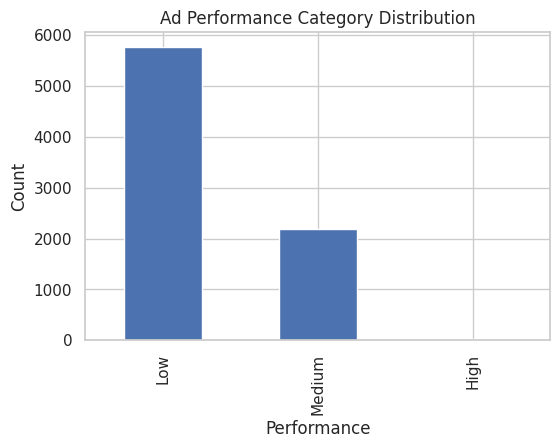

In [11]:
plt.figure(figsize=(6,4))
df['ad_performance'].value_counts().plot(kind='bar')
plt.title("Ad Performance Category Distribution")
plt.xlabel("Performance")
plt.ylabel("Count")
plt.show()


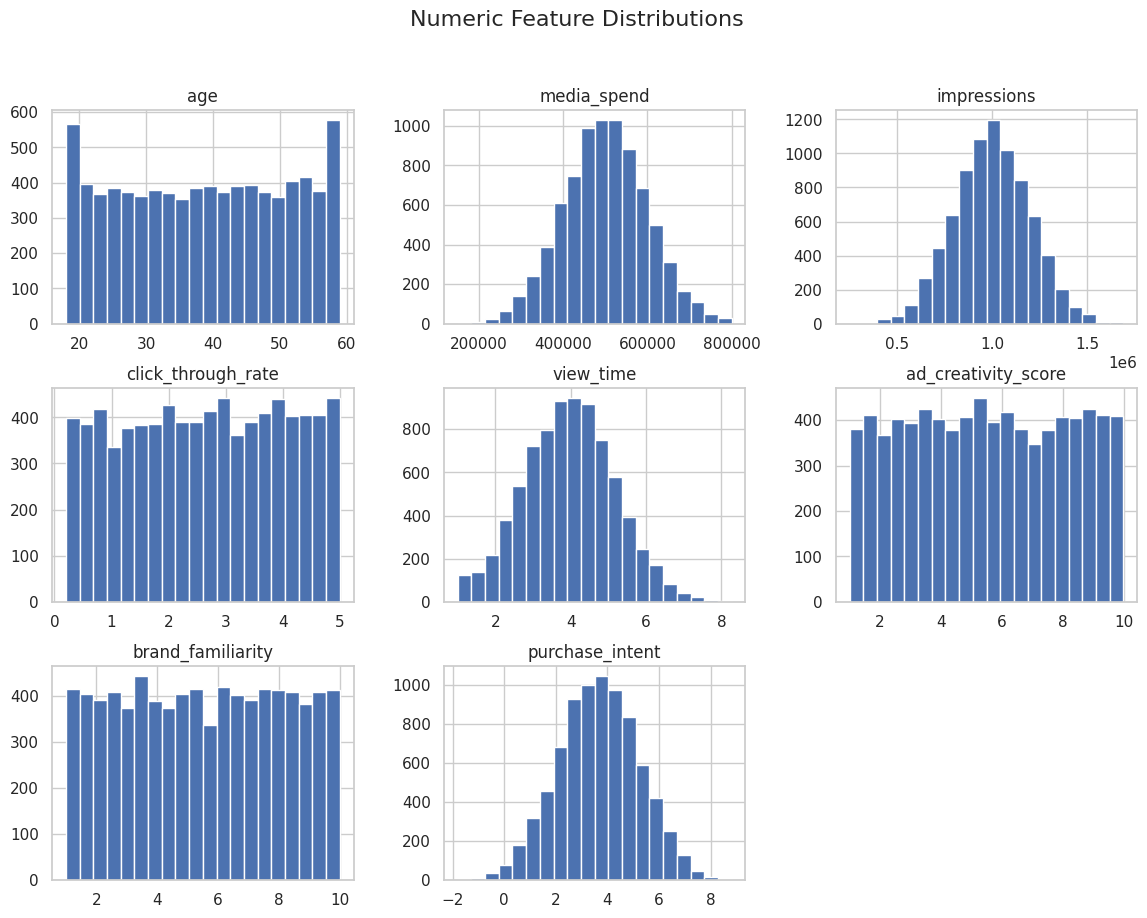

In [12]:
num_cols = [
    "age", "media_spend", "impressions", "click_through_rate",
    "view_time", "ad_creativity_score", "brand_familiarity",
    "purchase_intent"
]

df[num_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()


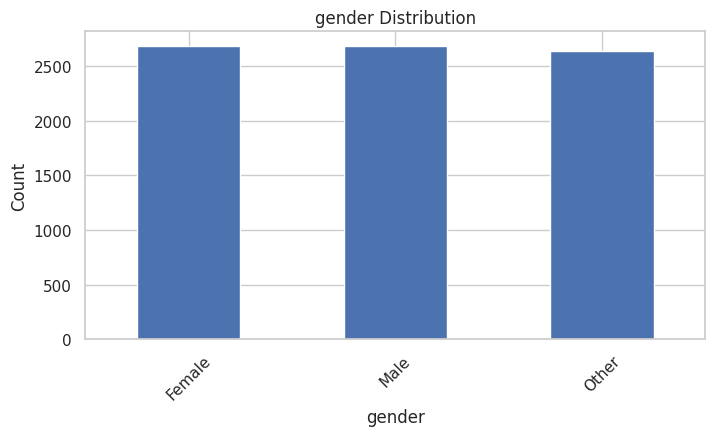

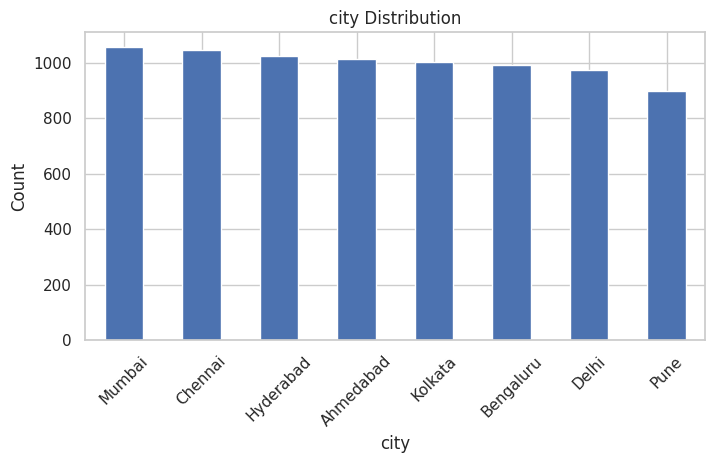

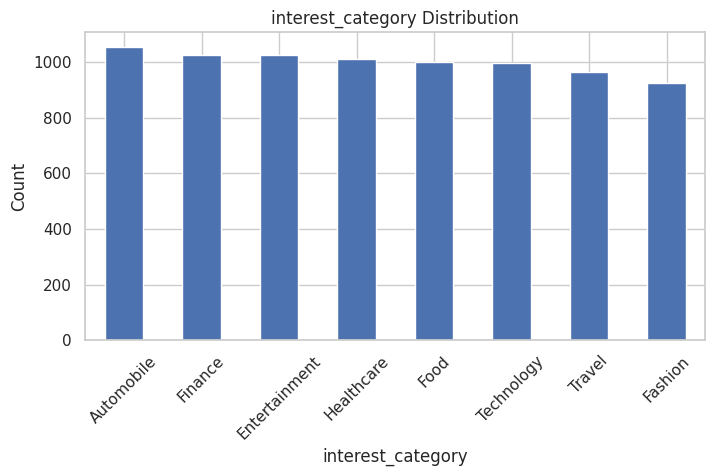

In [13]:
cat_cols = ["gender", "city", "interest_category"]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} Distribution")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


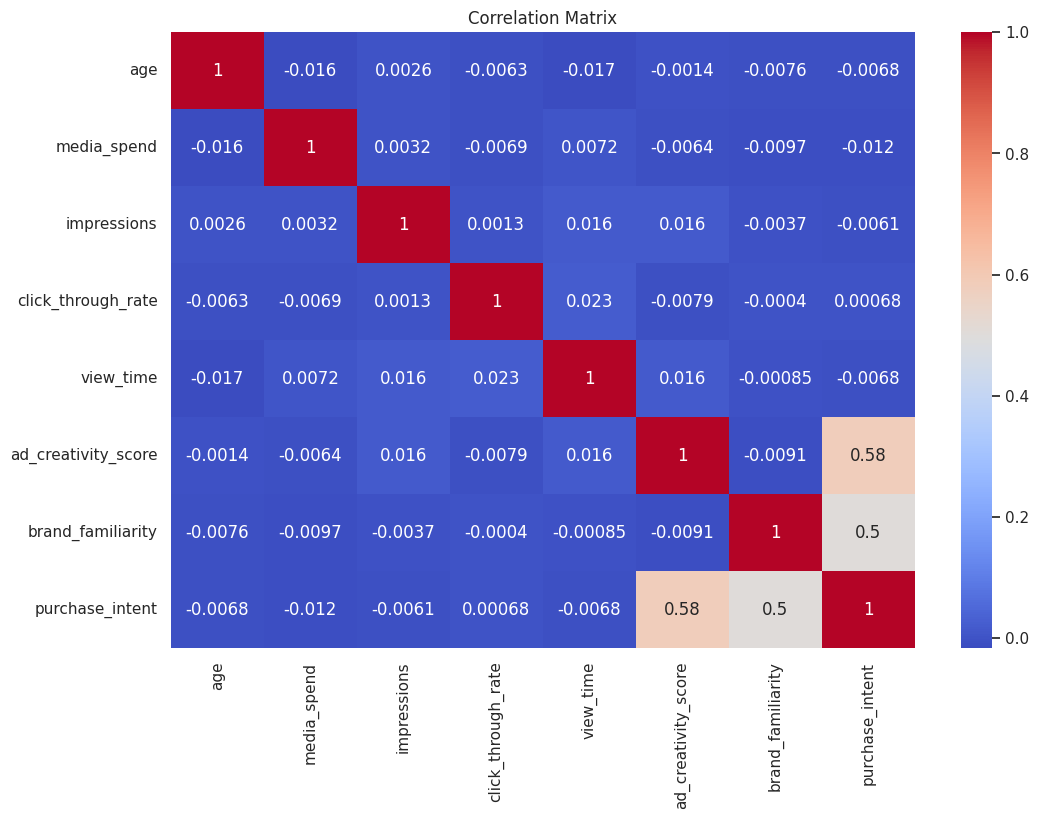

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


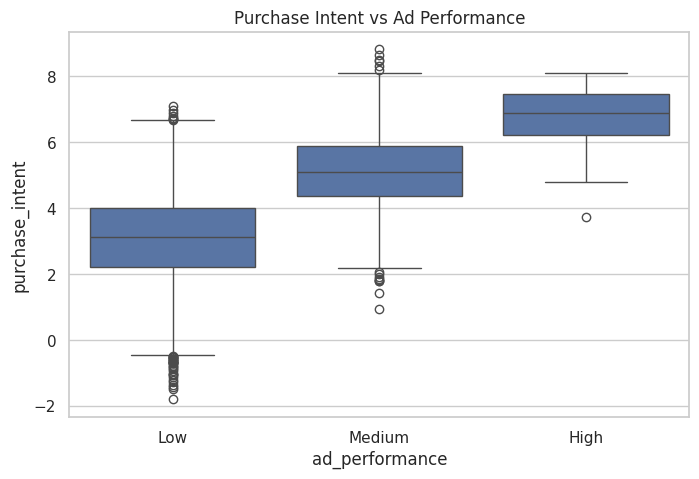

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x="ad_performance", y="purchase_intent", data=df)
plt.title("Purchase Intent vs Ad Performance")
plt.show()


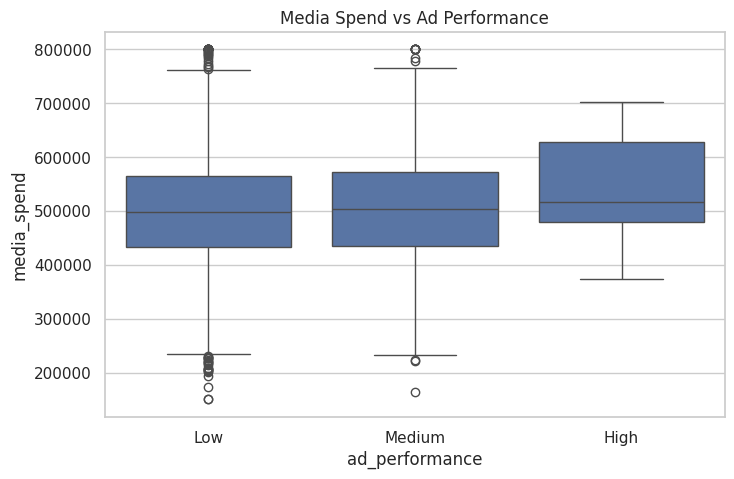

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x="ad_performance", y="media_spend", data=df)
plt.title("Media Spend vs Ad Performance")
plt.show()


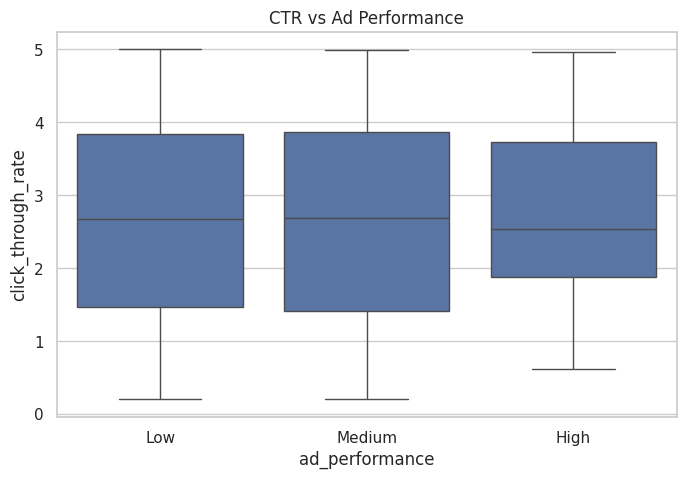

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="ad_performance", y="click_through_rate", data=df)
plt.title("CTR vs Ad Performance")
plt.show()
